# Library and Data Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

cancerDrugsDB_raw = pd.read_csv('https://raw.githubusercontent.com/mehdimerbah/chemotherapy-COVID19-study/main/data/raw_data/cancer_drugs_db_raw.csv?token=GHSAT0AAAAAABQVRZZXEI5ORKGJMF7Z2PSYYTPBLOA')
NIH_raw_data = pd.read_csv('https://raw.githubusercontent.com/mehdimerbah/chemotherapy-COVID19-study/main/data/raw_data/NIH_drugs_raw.csv?token=GHSAT0AAAAAABQVRZZXHXB5ABDVPCUKS3CYYTPBMEA')


# NIH Raw Data Preprocessing

In [5]:
NIH_raw_data.head(5)

,Name,EVS ID,Histology,Do not code,Remarks,Alternate Name,Primary Site,Abbreviation,NSC number,Category,Sub-category
0,"1,25-Dihydroxyvitamin D3",NaN,NaN,YES,Differentiation Inducing Agent; Vitamin,Calcijex;Calcitrol;Di-Vit-Sol;Multi-M;Rocatrol...,NaN,NaN,NaN,Differentiation inducing agent,NaN
1,1-Methyl-D-tryptophan,NaN,NaN,NO,This agent is being studied in the treatment o...,NaN,"Melanoma;Other types, NOS",NaN,NaN,Chemotherapy,Enzyme inhibitor
2,1018-ISS,NaN,NaN,NO,"As of March 2015, this drug is still in clinic...",ISS 1018 CpG oligodeoxynucleotide,Lymphoma,NaN,NaN,Chemotherapy,Targeted therapy--antisense
3,109881,NaN,NaN,NO,RPR 109881 is a substance that is being studi...,RPR-109881;RPR-109881A;taxoid 109881,Brain cancer,NaN,NaN,Chemotherapy,Natural product--taxane
4,131I-MIBG,NaN,"pheochromocytoma, paraganglioma, neuroblastoma",SEE_REMARKS,Do NOT code if given as a radioisotope for sca...,I131 metaiodobenzylguanidine,NaN,NaN,NaN,Radiation,Radioisotope


In [6]:
NIH_Drugs_DF = NIH_raw_data[['Name', 'Alternate Name','Category', 'Primary Site', 'Sub-category']]
NIH_Drugs_DF.head(5)

,Name,Alternate Name,Category,Primary Site,Sub-category
0,"1,25-Dihydroxyvitamin D3",Calcijex;Calcitrol;Di-Vit-Sol;Multi-M;Rocatrol...,Differentiation inducing agent,NaN,NaN
1,1-Methyl-D-tryptophan,NaN,Chemotherapy,"Melanoma;Other types, NOS",Enzyme inhibitor
2,1018-ISS,ISS 1018 CpG oligodeoxynucleotide,Chemotherapy,Lymphoma,Targeted therapy--antisense
3,109881,RPR-109881;RPR-109881A;taxoid 109881,Chemotherapy,Brain cancer,Natural product--taxane
4,131I-MIBG,I131 metaiodobenzylguanidine,Radiation,NaN,Radioisotope


In [7]:
NIH_Drugs_DF = NIH_Drugs_DF.dropna()
NIH_Drugs_DF.head(5)

,Name,Alternate Name,Category,Primary Site,Sub-category
2,1018-ISS,ISS 1018 CpG oligodeoxynucleotide,Chemotherapy,Lymphoma,Targeted therapy--antisense
3,109881,RPR-109881;RPR-109881A;taxoid 109881,Chemotherapy,Brain cancer,Natural product--taxane
5,131I-TM-601,Iodine I 131 TM-601,Radiation,Glioma,Immunotoxin conjugated with radiation (radiois...
9,2B1 bispecific murine MAb,"2B1;2B1 antibody, bispecific","Biologic therapy (BRM, immunotherapy)",Breast cancer;Ovarian cancer,Passive monoclonal antibody
14,5-Aza-2'Deoxy-cytidine,Decytabine,Chemotherapy,CML,Cytostatic agent--DNA methyl transferase inhib...


## Activity Sites Visualization


### Creating Helper Mehtods

In [8]:
## Creating a function to generate a wordcloud to see how the words are distributed

img_count = 0
def get_wordcloud(token_set):
  global img_count
  ### we extended the stopword set to avoid plotting 'https' and 'co' as they 
  ###occur frequently in the links
  wordcloud = WordCloud(width = 600, height = 600, 
              background_color ='white', 
              stopwords = STOPWORDS.union({'cancer',''}), 
              min_font_size = 10).generate(token_set) 

  # plot the WordCloud image                        
  plt.figure(figsize = (6, 6), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0)
  figname = 'wordcloud'+ str(img_count)
  plt.savefig(figname) 
  img_count+=1

In [9]:
## Token extraction function

def extract_tokens(item_list):
  tokens = ''
  for item in item_list:
    temp = str(item).lower().strip()
    temp = temp.replace('\n', ' ')
    temp = temp.replace('&amp', ' ')
    temp = temp.replace('#', ' ')
    temp = temp.replace('-', ' ')
    temp = temp.replace(';', ' ')
    temp = ' '.join(temp.split())
    tokens += temp + ' '
  return tokens

### Token Extraction and Visualization

In [10]:
# Treatment Categories
categories = NIH_Drugs_DF['Category']
categories = extract_tokens(categories)

# Primary action site
primary_sites = NIH_Drugs_DF['Primary Site']
primary_sites = extract_tokens(primary_sites)

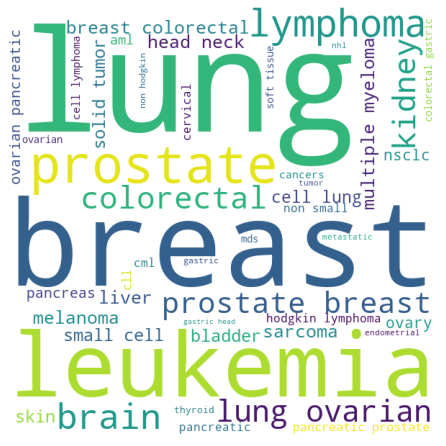

In [11]:
get_wordcloud(primary_sites)

## Filter for Lung Cancer and Chemotherapy

In [12]:
NIH_Drugs_DF = NIH_Drugs_DF[NIH_Drugs_DF['Category'] ==  'Chemotherapy']
NIH_Drugs_DF = NIH_Drugs_DF[NIH_Drugs_DF['Primary Site'] == 'Lung']
NIH_Drugs_DF.head(5)

,Name,Alternate Name,Category,Primary Site,Sub-category
94,Alectinib,Alecensa;ALK inhibitor CH5424802,Chemotherapy,Lung,ALK Inhibitor
305,Brigatinib,Alunbrig,Chemotherapy,Lung,anaplastic lymphoma kinase
513,Dacomitinib,Vizimpro,Chemotherapy,Lung,Small molecule inhibitor
987,JNJ-6372,JNJ-61186372,Chemotherapy,Lung,Anti=EGFR antibody
1068,Lorlatinib,Lorbrena,Chemotherapy,Lung,ALK Inhibitor


In [13]:
NIH_drugs = NIH_Drugs_DF.Name
NIH_Drugs_DF.to_csv('NIH_drugs_data_preprocessed.csv', index = False)
NIH_drugs.to_csv('NIH_drugs.csv', index = False)

# Cancer Drugs DB Data Preprocessing

In [14]:
cancerDrugsDB_raw.head(4)

,Product,EMA,FDA,EN,Other,WHO,Year,Generic,DrugBank ID,ATC,ChEMBL,Indications,Targets,Last Update
0,Abemaciclib,Y,Y,N,NaN,N,2017.0,N,"<a href=""https://go.drugbank.com/drugs/DB12001...",L01EF03,"<a href=""https://www.ebi.ac.uk/chembl/compound...",Advanced Breast Cancer; Metastatic Breast Cancer,CDK6; CDK4; CCND1; CCND3; CDKN2A; NRAS; CCND2;...,01/02/2022
1,Abiraterone,Y,Y,N,NaN,Y,2011.0,Y,"<a href=""https://go.drugbank.com/drugs/DB05812...",L02BX03,"<a href=""https://www.ebi.ac.uk/chembl/compound...",Metastatic Castration Resistant Prostate Cancer,CYP17A1; DSE; TSPYL1; PTEN,01/02/2022
2,Acalabrutinib,Y,Y,N,NaN,N,2017.0,N,"<a href=""https://go.drugbank.com/drugs/DB11703...",L01EL02,"<a href=""https://www.ebi.ac.uk/chembl/compound...",Chronic Lymphocytic Leukaemia (CLL); Mantle Ce...,LYN; FYN; BTK; TEC; ITK; TXK; BLK; BMX; ERBB4,01/02/2022
3,Aclarubicin,N,N,N,Japan,N,NaN,NaN,"<a href=""https://go.drugbank.com/drugs/DB11617...",L01DB04,"<a href=""https://www.ebi.ac.uk/chembl/compound...",NaN,SMN1; TOP2B; CSF2,22/09/2020


In [15]:
cancerDrugsDB_DF = cancerDrugsDB_raw[['Product','Year','Indications','Targets']]
cancerDrugsDB_DF.head(5)

,Product,Year,Indications,Targets
0,Abemaciclib,2017.0,Advanced Breast Cancer; Metastatic Breast Cancer,CDK6; CDK4; CCND1; CCND3; CDKN2A; NRAS; CCND2;...
1,Abiraterone,2011.0,Metastatic Castration Resistant Prostate Cancer,CYP17A1; DSE; TSPYL1; PTEN
2,Acalabrutinib,2017.0,Chronic Lymphocytic Leukaemia (CLL); Mantle Ce...,LYN; FYN; BTK; TEC; ITK; TXK; BLK; BMX; ERBB4
3,Aclarubicin,NaN,NaN,SMN1; TOP2B; CSF2
4,Afatinib,2013.0,Metastatic Non-Small Cell Lung Cancer; Refract...,EGFR; ERBB2; ERBB4; KRAS; EML4; MET; BRAF; NRG...


### Token Extraction and Visualization

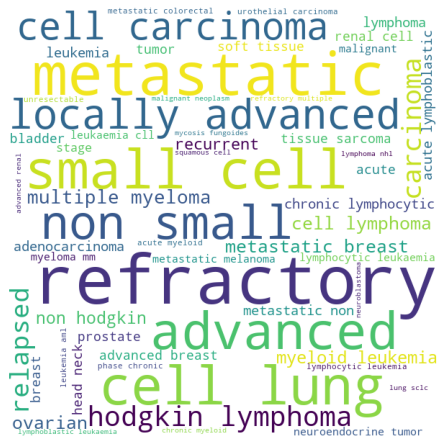

In [16]:
cancerDrugsDB_DF = cancerDrugsDB_DF.dropna()
indications = cancerDrugsDB_DF['Indications']
indications = extract_tokens(indications)
get_wordcloud(indications)

In [17]:
cancerDrugsDB_DF = cancerDrugsDB_DF[cancerDrugsDB_DF['Indications'].str.contains('lung')]
cancerDrugsDB_DF.head()

,Product,Year,Indications,Targets
4,Afatinib,2013.0,Metastatic Non-Small Cell Lung Cancer; Refract...,EGFR; ERBB2; ERBB4; KRAS; EML4; MET; BRAF; NRG...
7,Alectinib,2015.0,Refractory; metastatic Non small cell lung cancer,ALK; FGFR1; EML4; NPM1; CDKN2A; SMAD4; RET
32,Bevacizumab,2004.0,Cervical Cancer Metastatic; Metastatic Colorec...,VEGFA; PRKCA; EDN1; VEGFC; MGAT4A; VEGFB; RGS5...
50,Carboplatin,1989.0,Advanced Cervical Cancer; Advanced Endometrial...,GCLC; ATP7A; GPX5; PRRC2A; XRCC1; TP73; SOX10;...
56,Ceritinib,2014.0,Refractory; locally advanced Non-small cell lu...,IGF1R; ALK; INSR; TSSK1B; SRC; MAP2K1; EML4; R...


In [18]:
CDDB_drugs = cancerDrugsDB_DF.Product
CDDB_targets = cancerDrugsDB_DF.Targets
CDDB_DrugToTarget_DF = cancerDrugsDB_DF[['Product','Targets']]
CDDB_DrugToTarget_DF

,Product,Targets
4,Afatinib,EGFR; ERBB2; ERBB4; KRAS; EML4; MET; BRAF; NRG...
7,Alectinib,ALK; FGFR1; EML4; NPM1; CDKN2A; SMAD4; RET
32,Bevacizumab,VEGFA; PRKCA; EDN1; VEGFC; MGAT4A; VEGFB; RGS5...
50,Carboplatin,GCLC; ATP7A; GPX5; PRRC2A; XRCC1; TP73; SOX10;...
56,Ceritinib,IGF1R; ALK; INSR; TSSK1B; SRC; MAP2K1; EML4; R...
66,Cyclophosphamide,SLC22A16; NOS3; QUINONE REDUCTASE 2; GNL3; XRC...
87,Docetaxel,TUBA3D; TUBA4A; TUBA1B; TUBA3E; TUBB8; TUBB2B;...
107,Everolimus,MTOR; FKBP1A; GNAQ; RPTOR; BRCA2; STK11; BRAF;...
171,Nab-Paclitaxel,TUBB; TUBB8; TUBA4A; TUBA3E; TUBB2A; TUBA1A; T...
188,Paclitaxel,TUBB; TUBB8; TUBA4A; TUBA3E; TUBB2A; TUBA1A; T...


In [19]:
cancerDrugsDB_DF.to_csv('cancerDrugsDB_data_preprocessed.csv')
CDDB_DrugToTarget_DF.to_csv('CDDB_DrugToTarget_mapping.csv')